# HW2 Brief Report
### Part 1 : All Cuisines Types Clustering Visualization
  - The ingredients dataset has clear region boundary, from the same region cuisines have similar ingredients.
  - The Flavor dataset has no region boundary, as different cuisines share common flavors.

### Part 2 : PCA Analysis
  - For the original ingredients dataset (yummly_ingrX.pkl), the dataset originally contained 236 dimensions. After applying PCA, 208 components were retained, capturing 95% of the variance in the data. The percentage contribution of each component is detailed in the corresponding output section.
  - For the original flavor dataset (yum_tfidf.pkl), the dataset originally had 1108 dimensions. Following PCA, 98 components were retained, also capturing 95% of the variance. The percentage contribution of each component is similarly listed in the corresponding output section.
  - While both datasets achieve similar levels of variance retention, the ingredients dataset offers a more nuanced representation by preserving a greater number of components. This could potentially provide more detailed information for subsequent analyses, such as clustering or classification.

### Part 3 : K-Mean Clustering
  - Despite applying PCA (which captures 95% of the variance for both ingredients and flavor datasets) to reduce the dataset's dimensions, the K-Means algorithm struggles with high-dimensional data due to the "curse of dimensionality." This challenge can lead to suboptimal clustering results.
  - For both ingredients and flavor datasets, the elbow method and silhouette score fail to provide a clear choice for the optimal number of clusters (N). The elbow method shows a continuous downward trend without any clear flattening, and the silhouette score peaks at around 0.12 (N=2), a low value suggesting poor cluster separation. Additionally, the silhouette plot exhibits jagged fluctuations, further indicating the difficulty in defining distinct cluster boundaries.
  - The K-means model tends to perform better when the dataset includes regional character that allow for distinct separation between clusters.
  - The ingredients dataset can be distinguished by region cuisine, but still has some overlapping when using K-means model.
  - The flavor dataset is challenging to distinguish by region cuisine, as different cuisines share some common flavors.

 **1. K-Mean Clustering--- Ingredients**

  For this part, I did 2 experiments, one is for 4-cuisine-type, one is for all-cuisine-type

 **(1) For 4-Cuisine-Type**

    - K-means model can't use the elbow and silhouette score to detect the reasonable N in this 4-cuisine-types dataset, which maybe indicate this model is not applying this dataset quite well.
    - From the scatter plot, assigned N=4 (as we know the cuisine results from original data), the scatter plot partially proves the elbow and silhouette score conclusion.
    - There are lots of overlapping spots on the Italian and French. This reflects K-means model will cluster Italian and Frensh cuisines into the same group based on their ingredients, which is reasonable considering their similar cuisines.
    - For this dataset, the the K-means will dived them into 3 reasonable groups based on ingredients:
      - Italian and Frensh
      - Indian
      - Japanese

 **(2) For All-Cuisine-Type**

    - K-means model can't use the elbow and silhouette score to detect the reasonable N, which maybe indicate this model is not applying this all cuisines dataset.
    - From the scatter plot, assigned N=25 (as we know the cuisine results from original data) or other values, the scatter plot proves the elbow and silhouette score conclusion. There are lots of overlapping spots on the plot. It is very hard to observe distinguish clusters.
    - However, from the scatter plot, if we could find that the same continents cuisines coming from the close countries share more same ingredients because they have similar color.

 **2. K-Mean Clustering--- Flavor**

 **(1) For All-Cuisine-Type**

    - The K-means model can't effectively use the elbow and silhouette scores to determine a reasonable number of clusters (N). This suggests that the model may not be suitable for the entire dataset of cuisines.
    -  From the scatter plot, assigning N=21 (which aligns with known cuisine results from the original flavor data) or other values don't help to do clustering. The scatter plot shows that different colored dots are scattered throughout the plot, indicating a lack of clear clustering.
    - The flavor dataset is challenging to distinguish by cuisine, as different cuisines share some common flavors.

# Part 4 : DBSCAN, Hierarchical and GMM Clustering
- For the ingredients and flavor datasets, all these models (DBSCAN, Hierarchical and GMM Clustering) don't work well even though I use the PCA((which captures 95% of the variance for both ingredients and flavor datasets) ) to reduce dimensions and use optimizations for models. There are lots of overlapping. It is hard to find the clear boundary.
- The DBSCAN performance the worst no matter the ingredients dataset or flavor dataset.
- The Hierarchical and GMM Clustering performances a little bit well for the ingredient dataset, but still bad for the flavor dataset. Among these 2 models, the GMM is better than Hierarchical.









# Data Prepare

In [ ]:
!pip install pandas==1.3.5



In [ ]:
!pip install nltk
!pip install seaborn

In [ ]:
# Install necessary packages
# Install necessary packages


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import itertools
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK resources
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Take the long string in 'ingredients', lemmatize, regex, and split into words
def split_ingr(x):
    wnl = WordNetLemmatizer()
    cleanlist = []
    lst = x.strip('[]').split(',')
    cleanlist = [' '.join(wnl.lemmatize(word.lower()) for word in word_tokenize(re.sub('[^a-zA-Z]', ' ', item))) for item in lst]
    return cleanlist

# Remove low-information words from ingredients
def remove_word(word):
    alist = ['low fat', 'reduced fat', 'fat free', 'fatfree', 'nonfat', 'gluten free', 'free range',
             'reduced sodium', 'salt free', 'sodium free', 'low sodium', 'sweetened', 'unsweetened', 'large', 'extra large', 'oz ']
    for item in alist:
        word = word.replace(item, '')
    return word

# Match ingredients in Yummly recipes to ingredients in graph
def cleanup_ingredients(ingr, df, col):
    df_ingr = set()
    df[col].map(lambda x: [df_ingr.add(i) for i in x])

    long_ingredients = filter(lambda x: ' ' in x, ingr)
    short_ingredients = ingr - set(long_ingredients)
    df_dic = {}

    for item in long_ingredients:
        for key in df_ingr:
            if item in key:
                if key not in df_dic:
                    df_dic[key] = [item]
                else:
                    df_dic[key].append(item)

    for item in short_ingredients:
        for key in df_ingr:
            if item in key.split():
                if key not in df_dic:
                    df_dic[key] = [item]
                else:
                    df_dic[key].append(item)

    diff_dic = df_ingr - set(df_dic.keys())

    df_dic = tweak_dic(df_dic, diff_dic)
    diff_dic = df_ingr - set(df_dic.keys())
    print('Length of ingredients, matched ingredients, missed ingredients')
    print(len(df_ingr), len(df_dic.keys()), len(diff_dic))

    df2 = df.copy()
    df2['len_diff'] = df2[col].apply(lambda x: count_missing(x, df_dic))
    df2['match ingredients'] = df2[col].apply(lambda x: ingr_replace(x, df_dic))
    df2['len_match'] = df2['match ingredients'].apply(lambda x: len(x))

    # Remove entries with less match ingredients or no matching ingr_ingredients
    df3 = df2[(df2['len_diff'] < 3) & (df2['len_match'] != 0)]
    print('Dataframe shape before and after filtering')
    print(df2.shape, df3.shape)

    # Sort ingredients set for later matching to flavor
    match_ingr = set()
    df3['match ingredients'].map(lambda x: [match_ingr.add(i) for i in x])
    sorted_ingr = sorted(list(match_ingr))

    # Create columns for each ingredient
    df4 = df3.copy()
    for item in sorted_ingr:
        df4[item] = df4['match ingredients'].apply(lambda x: item in x)

    df_X = df4.drop(df3.columns, axis=1)

    return df4, df_X

# Tweak the dictionary to catch some spelling differences
def tweak_dic(df_dic, diff_df):
    alist = ['chile', 'chili', 'chilies', 'chilli', 'sriracha']
    for pepper in alist:
        for item in filter(lambda x: pepper in x, diff_df):
            if item not in df_dic:
                df_dic[item] = ['tabasco pepper']

    for item in filter(lambda x: 'flour' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['whole grain wheat flour']

    for item in filter(lambda x: 'tumeric' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['turmeric']

    for item in filter(lambda x: 'yoghurt' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['yogurt']

    for item in filter(lambda x: 'sausage' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['smoked sausage']

    alist = ['rib', 'chuck', 'sirloin', 'steak']
    for beef in alist:
        for item in filter(lambda x: beef in x, diff_df):
            if item not in df_dic:
                df_dic[item] = ['beef']

    for item in filter(lambda x: 'fillet' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['raw fish']

    for item in filter(lambda x: 'mozzarella' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['mozzarella cheese']

    for item in filter(lambda x: 'spinach' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['dried spinach']

    for item in filter(lambda x: 'curry' in x, diff_df):
        if item not in df_dic:
            df_dic[item] = ['coriander', 'turmeric', 'cumin', 'cayenne']

    return df_dic

# Count missing ingredients after matching
def count_missing(lst, df_dic):
    cnt = 0
    for item in lst:
        if item in df_dic:
            cnt += 1
        elif 'salt' in item.split():
            cnt += 1
        elif 'sugar' in item.split():
            cnt += 1
        elif 'water' in item.split():
            cnt += 1
        elif 'oil' in item.split():
            cnt += 1

    return len(lst) - cnt

# Replace ingredients in recipes with ingredients in the flavor network
def ingr_replace(lst, df_dic):
    temp = set()
    for item in lst:
        if item in df_dic:
            temp.update(df_dic[item])
    return temp

# Using flavor network to project recipes from ingredient matrix to flavor matrix
def flavor_profile(df, ingr, comp, ingr_comp):
    sorted_ingredients = df.columns
    underscore_ingredients = []
    for item in sorted_ingredients:
        underscore_ingredients.append(item.replace(' ', '_'))

    print(len(underscore_ingredients), len(sorted_ingredients))

    ingr_total = ingr_comp.join(ingr, how='right', on='# ingredient id')
    ingr_total = ingr_total.join(comp, how='right', on='compound id')

    ingr_pivot = pd.crosstab(ingr_total['ingredient name'], ingr_total['compound id'])
    ingr_flavor = ingr_pivot[ingr_pivot.index.isin(underscore_ingredients)]

    df_flavor = df.values.dot(ingr_flavor.values)
    print(df.shape, df_flavor.shape)

    return df_flavor

# Normalize flavor matrix with tfidf method
def make_tfidf(arr):
    '''input, numpy array with flavor counts for each recipe and compounds
    return numpy array adjusted as tfidf
    '''
    arr2 = arr.copy()
    N = arr2.shape[0]
    l2_rows = np.sqrt(np.sum(arr2**2, axis=1)).reshape(N, 1)
    l2_rows[l2_rows == 0] = 1
    arr2_norm = arr2 / l2_rows

    arr2_freq = np.sum(arr2_norm > 0, axis=0)
    arr2_idf = np.log(float(N + 1) / (1.0 + arr2_freq)) + 1.0

    from sklearn.preprocessing import normalize
    tfidf = np.multiply(arr2_norm, arr2_idf)
    tfidf = normalize(tfidf, norm='l2', axis=1)
    print(tfidf.shape)
    return tfidf

if __name__ == '__main__':
    yum = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly.pkl')
    #drop duplicates
    yum = yum.drop_duplicates(['id'], keep='first')
    #drop low ratings
    yum = yum[yum['rating']>2]
    #drop dishes such as dessert and sauce
    yum = yum[yum['course']!='[Desserts]']
    yum = yum[yum['course']!='[Condiments and Sauces]']
    #clean up cuisine labels
    yum['cuisine']= yum['cuisine'].apply(lambda x: x.strip('[]'))

    cuisine_dic = {'Thai, Asian': 'Thai', 'Chinese, Asian':'Chinese', 'Japanese, Asian':'Japanese',
     'Southern & Soul Food, American': 'Southern & Soul Food',
     'Mediterranean, Greek': 'Mediterranean',
     'Cajun & Creole, Southern & Soul Food, American': 'Southern & Soul Food',
     'Asian, Japanese': 'Japanese','Cajun & Creole, American': 'Cajun & Creole',
     'Hawaiian, American': 'Hawaiian', 'Asian, Thai': 'Thai', 'American, Cuban':'Cuban',
     'Greek, Mediterranean': 'Greek', 'Indian, Asian': 'Indian','Asian, Chinese':'Chinese',
     'American, Kid-Friendly': 'American', 'Spanish, Portuguese':'Spanish',
     'Mexican, Southwestern': 'Mexican', 'Southwestern, Mexican': 'Southwestern',
     'American, Southern & Soul Food': 'Southern & Soul Food',
     'Cajun & Creole, Southern & Soul Food': 'Southern & Soul Food',
     'Portuguese, American':'American','American, French': 'American',
     'American, Cajun & Creole':'American',
     'American, Cajun & Creole, Southern & Soul Food': 'American',
     'Irish, American':'American'
        }

    yum['cuisine'] = yum['cuisine'].apply(lambda x: cuisine_dic[x] if x in cuisine_dic else x)
    #remove some cusines with few dishes
    subcuisine = list(yum['cuisine'].value_counts().index[:25])
    yum = yum[yum['cuisine'].isin(subcuisine)]
    #clean up ingredients and create list
    yum['clean ingredients'] = yum['ingredients'].apply(lambda x: split_ingr(x))
    yum['clean ingredients'] = yum['clean ingredients'].apply(lambda x:[remove_word(word) for word in x])
    yum.to_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly_clean.pkl')

    #make list and set for all ingredients
    yum_lst = list(itertools.chain(*(yum['clean ingredients'].tolist())))
    yum_ingr = set(yum_lst)
    print(len(yum_lst), len(yum_ingr))

    #load ingr and comp information for the flavor network
    comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/comp_info.tsv',index_col=0,sep='\t')
    ingr_comp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/ingr_comp.tsv',sep='\t')
    ingr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/ingr_info.tsv',index_col=0,sep='\t')
    ingr['space ingredients']= ingr['ingredient name'].apply(lambda x: x.replace('_',' ') )
    ingr_ingredients = set()
    ingr['space ingredients'].map(lambda x: ingr_ingredients.add(x))
    print (len(ingr_ingredients))
    #clean up ingredients and get two dataframes
    yum_ingr, yum_X = cleanup_ingredients(ingr_ingredients, yum, 'clean ingredients')
    #pickle the dataframe yum_ingr and yum_X
    yum_ingr.to_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly_ingr.pkl')
    yum_X.to_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly_ingrX.pkl')
    #get flavor profile
    yum_flavor = flavor_profile(yum_X, ingr, comp, ingr_comp)
    #make tfidf from flavor profile
    yum_tfidf = make_tfidf(yum_flavor)
    #pickle numpy array as dataframes
    pd.DataFrame(yum_flavor).to_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yum_flavor.pkl')
    pd.DataFrame(yum_tfidf).to_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yum_tfidf.pkl')



71760 3652
1530
Length of ingredients, matched ingredients, missed ingredients
3652 2399 1253
Dataframe shape before and after filtering
(6788, 12) (5622, 12)


<ipython-input-40-613885af3318>:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df4[item] = df4['match ingredients'].apply(lambda x: item in x)


236 236


/usr/local/lib/python3.10/dist-packages/pandas/core/reshape/merge.py:1203: RuntimeWarning: invalid value encountered in cast
  if not (lk == lk.astype(rk.dtype))[~np.isnan(lk)].all():


(5622, 236) (5622, 1107)
(5622, 1107)


# Part 1 : All Cuisines Types Clustering Visualization
- The ingredients dataset has clear region boundary, from the same region cuisines have similar ingredients.
- The Flavor dataset has no region boundary, as differnet cuisines share common flavors.


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(5622, 236) [0, 191, 624, 825, 972, 1383, 1581, 2002, 2279, 2443, 2563, 2791, 2969, 3310, 3596, 3613, 3800, 4002, 4186, 4544, 4810, 4903, 5062, 5246, 5530, 5622]


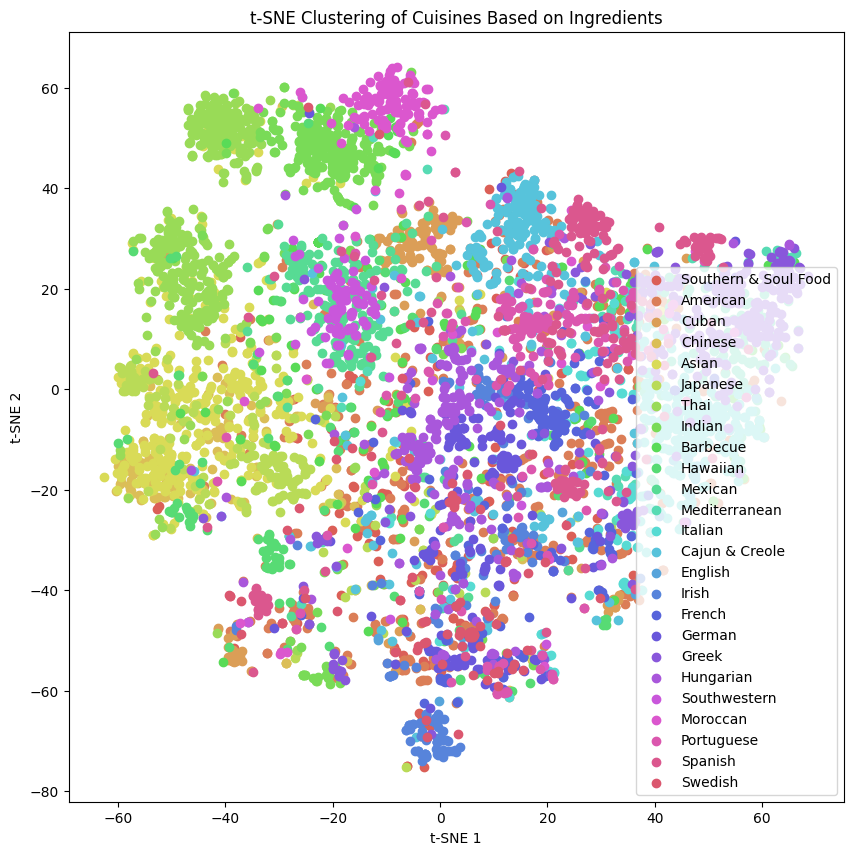

(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]


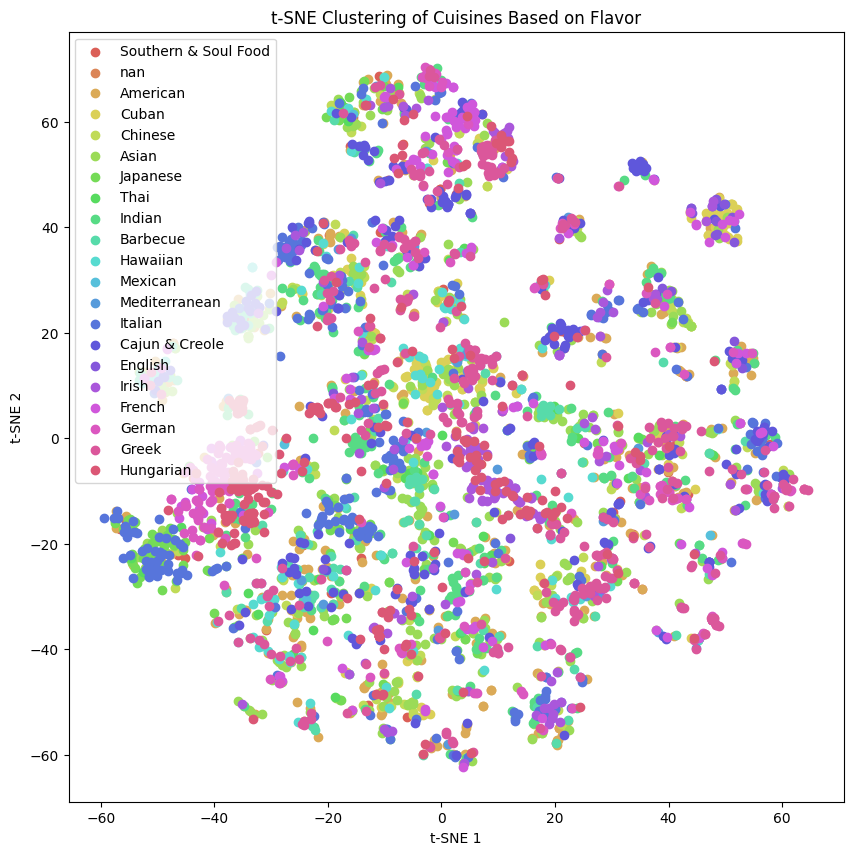

(3814, 1107) [0, 68, 68, 488, 689, 836, 1246, 1352, 1401, 1676, 1806, 1926, 1932, 1976, 2314, 2600, 2617, 2804, 3006, 3190, 3548, 3814]
(5622, 236) [0, 191, 624, 825, 972, 1383, 1581, 2002, 2279, 2443, 2563, 2791, 2969, 3310, 3596, 3613, 3800, 4002, 4186, 4544, 4810, 4903, 5062, 5246, 5530, 5622]


In [ ]:
  import pandas as pd
  import seaborn as sns
  import matplotlib.pyplot as plt
  from scipy.spatial.distance import pdist, squareform
  from sklearn.manifold import TSNE
  from bokeh.plotting import figure, output_file, show
  from bokeh.models import ColumnDataSource, HoverTool

  from google.colab import drive
  drive.mount('/content/drive')

  def tsne_cluster_cuisine(df, plot_title):
      # Get unique cuisines
      sublist = df['cuisine'].unique()
      lenlist = [0]
      df_sub = df[df['cuisine'] == sublist[0]]
      lenlist.append(df_sub.shape[0])

      for cuisine in sublist[1:]:
          temp = df[df['cuisine'] == cuisine]
          df_sub = pd.concat([df_sub, temp], axis=0, ignore_index=True)
          lenlist.append(df_sub.shape[0])

      df_X = df_sub.drop(['cuisine', 'recipeName'], axis=1)
      print(df_X.shape, lenlist)

      # Calculate the cosine distance matrix
      dist = squareform(pdist(df_X, metric='cosine'))

      # Modify the TSNE call to use random initialization
      tsne = TSNE(metric='precomputed', init='random').fit_transform(dist)

      # Color palette for different cuisines
      palette = sns.color_palette("hls", len(sublist))
      plt.figure(figsize=(10, 10))

      for i, cuisine in enumerate(sublist):
          plt.scatter(tsne[lenlist[i]:lenlist[i + 1], 0],
                      tsne[lenlist[i]:lenlist[i + 1], 1],
                      c=palette[i], label=cuisine)

      plt.legend()
      plt.title(f"t-SNE Clustering of Cuisines Based on {plot_title}")
      plt.xlabel("t-SNE 1")
      plt.ylabel("t-SNE 2")
      plt.show()

  def plot_bokeh(df, filename, plot_title):
      # Get unique cuisines
      sublist = df['cuisine'].unique()
      lenlist = [0]
      df_sub = df[df['cuisine'] == sublist[0]]
      lenlist.append(df_sub.shape[0])

      for cuisine in sublist[1:]:
          temp = df[df['cuisine'] == cuisine]
          df_sub = pd.concat([df_sub, temp], axis=0, ignore_index=True)
          lenlist.append(df_sub.shape[0])

      df_X = df_sub.drop(['cuisine', 'recipeName'], axis=1)
      print(df_X.shape, lenlist)

      # Calculate the cosine distance matrix
      dist = squareform(pdist(df_X, metric='cosine'))

      # Use random initialization for t-SNE
      tsne = TSNE(metric='precomputed', init='random').fit_transform(dist)

      # Create colors for Bokeh
      palette = sns.color_palette("hls", len(sublist))
      colors = []
      for i in range(len(sublist)):
          for j in range(lenlist[i + 1] - lenlist[i]):
              colors.append(palette[i])

      # Plot with Bokeh
      output_file(filename)

      # Create ColumnDataSource
      source = ColumnDataSource(
          data=dict(x=tsne[:, 0], y=tsne[:, 1],
                    cuisine=df_sub['cuisine'],
                    recipe=df_sub['recipeName'],
                    color=colors))

      hover = HoverTool(tooltips=[
          ("cuisine", "@cuisine"),
          ("recipe", "@recipe")])

      # Update plot creation
      p = figure(width=1000, height=1000, tools=[hover],
                title=f"Flavor Clustering Based on {plot_title}")

      # Use scatter instead of circle
      p.scatter(x='x', y='y', source=source, size=10, fill_color='color')

      show(p)


  yum_ingr = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly_ingr.pkl')
  yum_ingrX = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yummly_ingrX.pkl')
  yum_tfidf = pd.read_pickle('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/yum_tfidf.pkl')

  # Select all cuisines and plot t-SNE clustering with ingredients
  df_ingr = yum_ingrX.copy()
  df_ingr['cuisine'] = yum_ingr['cuisine']
  df_ingr['recipeName'] = yum_ingr['recipeName']
  tsne_cluster_cuisine(df_ingr, "Ingredients")

  # Select all cuisines and plot t-SNE clustering with flavor
  df_flavor = yum_tfidf.copy()
  df_flavor['cuisine'] = yum_ingr['cuisine']
  df_flavor['recipeName'] = yum_ingr['recipeName']
  tsne_cluster_cuisine(df_flavor, "Flavor")

  # Select all cuisines and do interactive plotting with Bokeh
  plot_bokeh(df_flavor, 'test1.html', "Flavor")
  plot_bokeh(df_ingr, 'test2.html', "Ingredients")


# Part 2 : PCA Analysis


## Part 2 : PCA Analysis - Ingredients

In [ ]:
# Make copies of the data to avoid changing the original datasets
df_ingr_copy = yum_ingrX.copy()
df_tfidf_copy = yum_tfidf.copy()
df_ingr_copy.head(5)

almond  anise  apple  apricot  artichoke  asparagus  avocado  bacon  \
0    False  False  False    False      False      False    False  False   
3    False  False  False    False      False      False    False  False   
5    False  False  False    False      False      False    False  False   
12   False  False  False    False      False      False    False  False   
13   False  False  False    False      False      False    False  False   

    banana  barley  ...  wheat  whiskey  whitefish  whole grain wheat flour  \
0    False   False  ...  False    False      False                    False   
3    False   False  ...  False    False      False                    False   
5    False   False  ...  False    False      False                    False   
12   False   False  ...  False    False      False                     True   
13   False   False  ...  False    False      False                    False   

     wine   wood    yam  yeast  yogurt  zucchini  
0   False  False  False  False   False     False  
3   False  False  False  False   False     False  
5   False  False  False  False   False     False  
12  False  False  False  False   False     False  
13  False  False  False  False   False     False  

[5 rows x 236 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

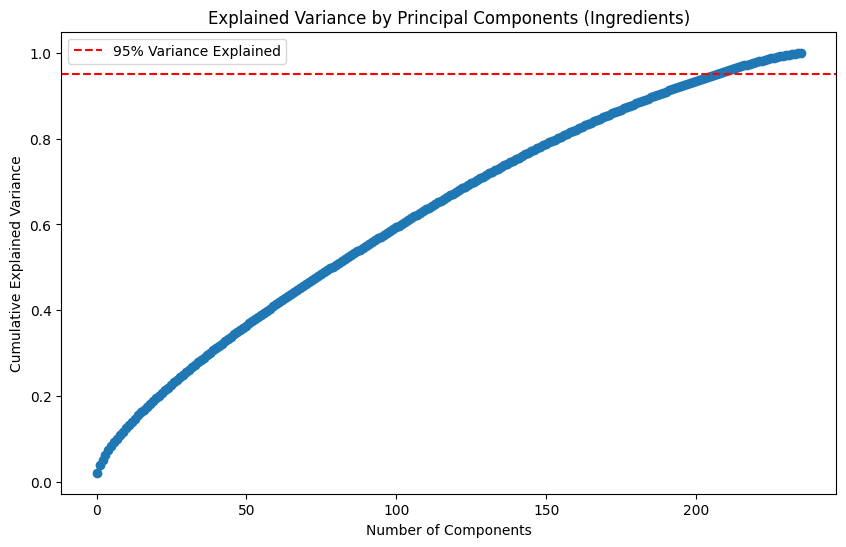

Number of components explaining 95% variance (Ingredients): 208
Explained variance by each component (Ingredients):
Component 1: 0.0215 (2.15% variability explained)
Component 2: 0.0169 (1.69% variability explained)
Component 3: 0.0128 (1.28% variability explained)
Component 4: 0.0119 (1.19% variability explained)
Component 5: 0.0110 (1.10% variability explained)
Component 6: 0.0092 (0.92% variability explained)
Component 7: 0.0092 (0.92% variability explained)
Component 8: 0.0086 (0.86% variability explained)
Component 9: 0.0083 (0.83% variability explained)
Component 10: 0.0080 (0.80% variability explained)
Component 11: 0.0079 (0.79% variability explained)
Component 12: 0.0077 (0.77% variability explained)
Component 13: 0.0074 (0.74% variability explained)
Component 14: 0.0073 (0.73% variability explained)
Component 15: 0.0071 (0.71% variability explained)
Component 16: 0.0070 (0.70% variability explained)
Component 17: 0.0068 (0.68% variability explained)
Component 18: 0.0067 (0.67

In [ ]:
# Select the dataset you want to apply PCA to (e.g., ingredients or flavor profile)
# Ingredients dataset (drop non-numeric columns like 'cuisine', 'recipeName')
df_X_ingr = df_ingr_copy

# Standardize the data (important step before PCA)
scaler = StandardScaler()
df_X_ingr_scaled = scaler.fit_transform(df_X_ingr)

# Apply PCA
pca = PCA()
pca.fit(df_X_ingr_scaled)

# Get explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()

# Plot the explained variance to find how many components explain 95% variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.legend()
plt.title('Explained Variance by Principal Components (Ingredients)')
plt.show()

# Determine how many components explain 95% of the variance
num_components_ingr = next(i for i, total_var in enumerate(cumulative_variance) if total_var >= 0.95) + 1
print(f'Number of components explaining 95% variance (Ingredients): {num_components_ingr}')

# List percentage of variability explained by each component
print("Explained variance by each component (Ingredients):")
for i, ratio in enumerate(explained_variance_ratio):
    print(f'Component {i+1}: {ratio:.4f} ({ratio*100:.2f}% variability explained)')


In [ ]:
# Fit PCA with the specified number of components
pca = PCA(n_components=num_components_ingr)
df_X_ingr_pca = pca.fit_transform(df_X_ingr_scaled)

# Convert the PCA result into a DataFrame for easier manipulation
df_X_ingr_pca1 = pd.DataFrame(df_X_ingr_pca, columns=[f'PC{i+1}' for i in range(num_components_ingr)])

# Display the new dataset
print("New dataset with components explaining 95% variance (Ingredients):")
print(df_X_ingr_pca1.head())

# Optional: Save the new dataset to a CSV file
df_X_ingr_pca1.to_csv('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/ingredients_pca_95_variance.csv', index=False)

New dataset with components explaining 95% variance (Ingredients):
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.490783 -1.011633 -1.026048 -3.365517 -1.553945  1.290570 -0.529336   
1 -0.690057 -0.474103 -0.521623  0.949290 -0.878834  0.171348 -1.009379   
2 -0.902687 -0.698736  0.268236 -0.004195  0.407756 -0.239084  0.663008   
3 -1.485827 -1.202679 -1.478821 -1.438699 -0.609542  1.432672 -0.099308   
4 -1.452261 -1.412869 -0.283131 -0.498125 -0.300249  0.366832 -0.153872   

        PC8       PC9      PC10  ...     PC199     PC200     PC201     PC202  \
0  0.387690  0.745716 -1.209560  ...  1.441727 -0.395023 -1.026880  1.671624   
1 -0.790114 -0.696410  1.337124  ...  0.625648  0.407167 -0.031732  0.844846   
2 -0.585345 -0.827869  0.915204  ... -0.018273 -0.058850 -0.358402 -0.694174   
3  0.125908  0.849617 -0.937146  ...  0.100879 -0.019013  0.716066 -1.544504   
4 -0.153142 -0.630213  0.831981  ...  0.217559  0.134693 -0.290918  0.315774   

 

## Part 2 : PCA Analysis - Ingredients

In [ ]:
df_tfidf_copy.columns

RangeIndex(start=0, stop=1107, step=1)

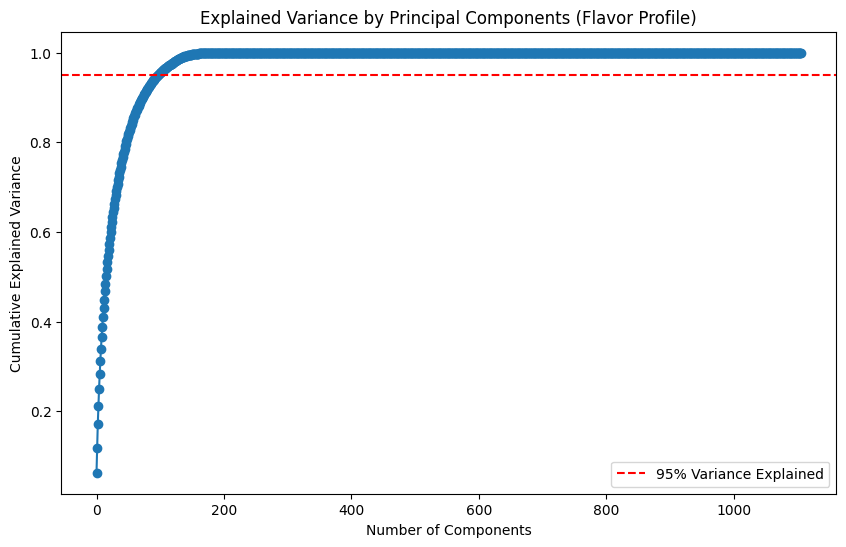

Number of components explaining 95% variance (Flavor Profile): 98
Explained variance by each component (Flavor Profile):
Component 1: 0.0630 (6.30% variability explained)
Component 2: 0.0562 (5.62% variability explained)
Component 3: 0.0518 (5.18% variability explained)
Component 4: 0.0420 (4.20% variability explained)
Component 5: 0.0376 (3.76% variability explained)
Component 6: 0.0333 (3.33% variability explained)
Component 7: 0.0292 (2.92% variability explained)
Component 8: 0.0269 (2.69% variability explained)
Component 9: 0.0257 (2.57% variability explained)
Component 10: 0.0228 (2.28% variability explained)
Component 11: 0.0214 (2.14% variability explained)
Component 12: 0.0201 (2.01% variability explained)
Component 13: 0.0194 (1.94% variability explained)
Component 14: 0.0188 (1.88% variability explained)
Component 15: 0.0171 (1.71% variability explained)
Component 16: 0.0165 (1.65% variability explained)
Component 17: 0.0155 (1.55% variability explained)
Component 18: 0.0150 

In [ ]:
# Repeat for the TF-IDF flavor profile dataset (optional)
df_X_flavor = df_tfidf_copy
df_X_flavor_scaled = scaler.fit_transform(df_X_flavor)

pca_flavor = PCA()
pca_flavor.fit(df_X_flavor_scaled)

explained_variance_ratio_flavor = pca_flavor.explained_variance_ratio_
cumulative_variance_flavor = explained_variance_ratio_flavor.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance_flavor, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.legend()
plt.title('Explained Variance by Principal Components (Flavor Profile)')
plt.show()

num_components_flavor = next(i for i, total_var in enumerate(cumulative_variance_flavor) if total_var >= 0.95) + 1
print(f'Number of components explaining 95% variance (Flavor Profile): {num_components_flavor}')

print("Explained variance by each component (Flavor Profile):")
for i, ratio in enumerate(explained_variance_ratio_flavor):
    print(f'Component {i+1}: {ratio:.4f} ({ratio*100:.2f}% variability explained)')

In [ ]:
# Fit PCA with the specified number of components
pca = PCA(n_components=num_components_flavor)
df_X_flavor_pca = pca.fit_transform(df_X_flavor_scaled)

# Convert the PCA result into a DataFrame for easier manipulation
df_X_flavor_pca1 = pd.DataFrame(df_X_flavor_pca, columns=[f'PC{i+1}' for i in range(num_components_flavor)])

# Display the new dataset
print("New dataset with components explaining 95% variance (Flavor):")
print(df_X_flavor_pca1.head())

# Optional: Save the new dataset to a CSV file
df_X_flavor_pca1.to_csv('/content/drive/MyDrive/Colab Notebooks/css581/HW2/data/flavor_pca_95_variance.csv', index=False)

New dataset with components explaining 95% variance (Flavor):
         PC1        PC2       PC3       PC4       PC5       PC6       PC7  \
0  11.555753   0.184746 -4.701517 -3.682014 -3.008785 -2.584015  1.028316   
1  -1.165861  -4.003706 -2.693431 -3.080051  0.790841 -7.172050  7.258571   
2  -9.856539 -13.630997 -1.252762  0.132346 -1.743445  5.046930  1.124521   
3  10.609405  -3.513188 -1.744287 -3.344301 -5.681540  4.806934 -0.434262   
4   2.829238  -2.428608 -4.351021  0.768385 -2.658152  3.152096  6.787430   

         PC8       PC9      PC10  ...      PC89      PC90      PC91      PC92  \
0  -3.291114 -0.936540  3.923664  ... -1.016565 -2.643861  0.243253 -0.541744   
1  11.560177  2.841081  3.482744  ... -1.224701  1.512773  0.160361 -0.145154   
2   1.773745  0.357085  3.551371  ...  0.285480 -0.437248  0.297939  0.561191   
3 -12.050141  1.073882  1.618614  ... -2.220099 -1.911298 -0.241296 -0.927261   
4  -5.925950 -4.846822 -5.669063  ... -0.224110  0.818863 -0.507889 -0

# Part 3 : K-Mean Clustering
## Findings
- The K-means model does not perform well on high-dimensional datasets due to the "curse of dimensionality," which can result in ineffective clustering.
- The ingredients dataset can be distinguish by regione cuisine, but still has some overlapping when using K-means model.
- The flavor dataset is challenging to distinguish by regione cuisine, as different cuisines share some common flavors.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

## Part 3 : K-Mean Clustering--- Ingredients
For this part, I did 2 experiments, one is for 4-cusine-type, one is for all-cusine-type

### For 4-cuisine-Type
- K-means model can't use the elvow and silhouette score to detect the resonable N in this 4-cuisine-types dataset, which maybe indicate this model is not applying this dataset quite well.
- From the scatter plot, assgine N=4 (as we know the cuisine results from original data), the scatter plot proves the elbow and silhouette score conclusion.
- There are lots of overlaping spots on the Italian and French. This reflects K-means model will cluster Italian and Frensh cuisine into the same group based on their ingredients, which is reasonable considering their similar cuisine.
- For this dataset, the the K-means will divde them into 3 resonable groups based on ingredients:
  - Italian and Frensh
  - Indian
  - Japanese

### For All-cuisine-Type
- K-means model can't use the elvow and silhouette score to detect the resonable N, which maybe indicate this model is not applying this all cusines dataset.
- From the scatter plot, assgine N=25 (as we know the cusine results from original data), the scatter plot proves the elbow and silhouette score conclusion. There are lots of overlapping spots on the plot. It is very hard to observe so many clusters.
- However, from the sctter plot, if we could find that the same continents cusines coming from the close contries share more same ingredients because they have similar color.

### Conclusion
- The K-means model does not perform quite well on high-dimensional datasets due to the "curse of dimensionality," which can lead to ineffective clustering.
- The K-means model tends to perform better when the dataset includes regional features that allow for distinct separation between clusters.
- The K-means model is more effective for fewer groups or clusters, making it less suitable for datasets requiring a larger number of distinct clusters.


## Part 3 : K-Mean Clustering--- Ingredients(4-Cuisine-Type)

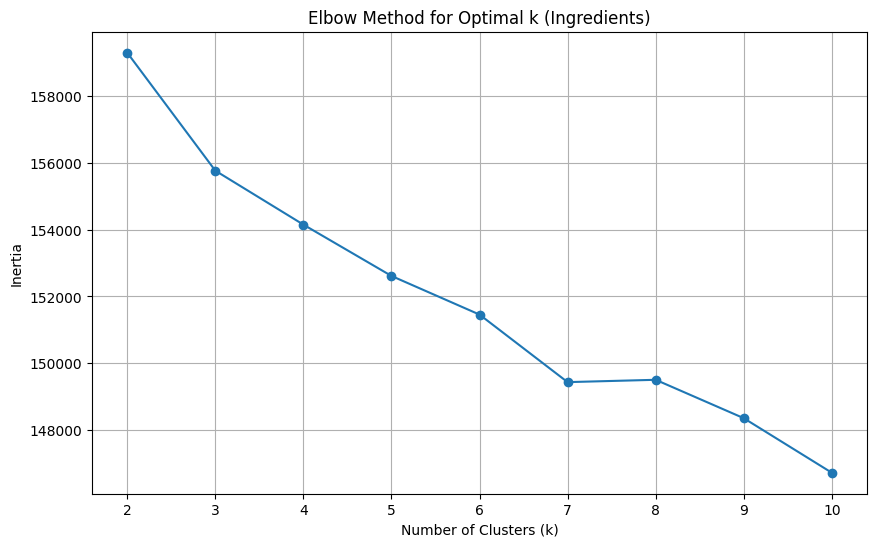

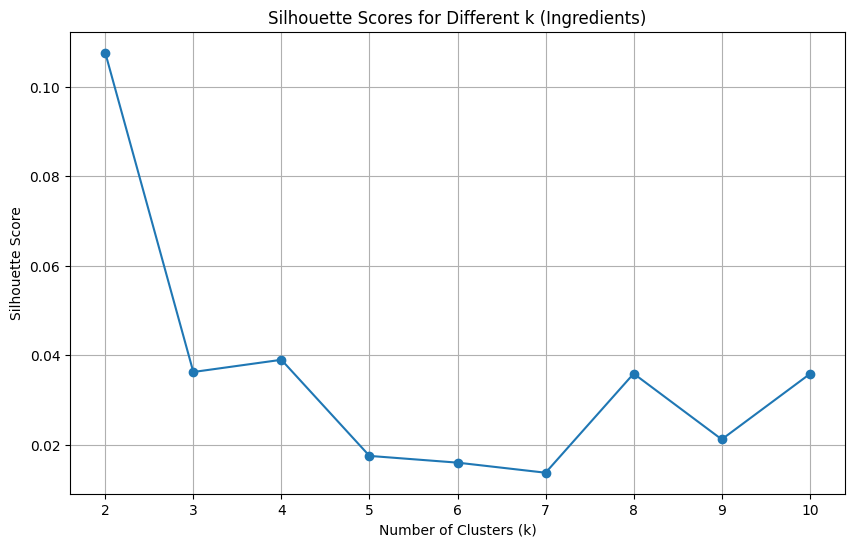

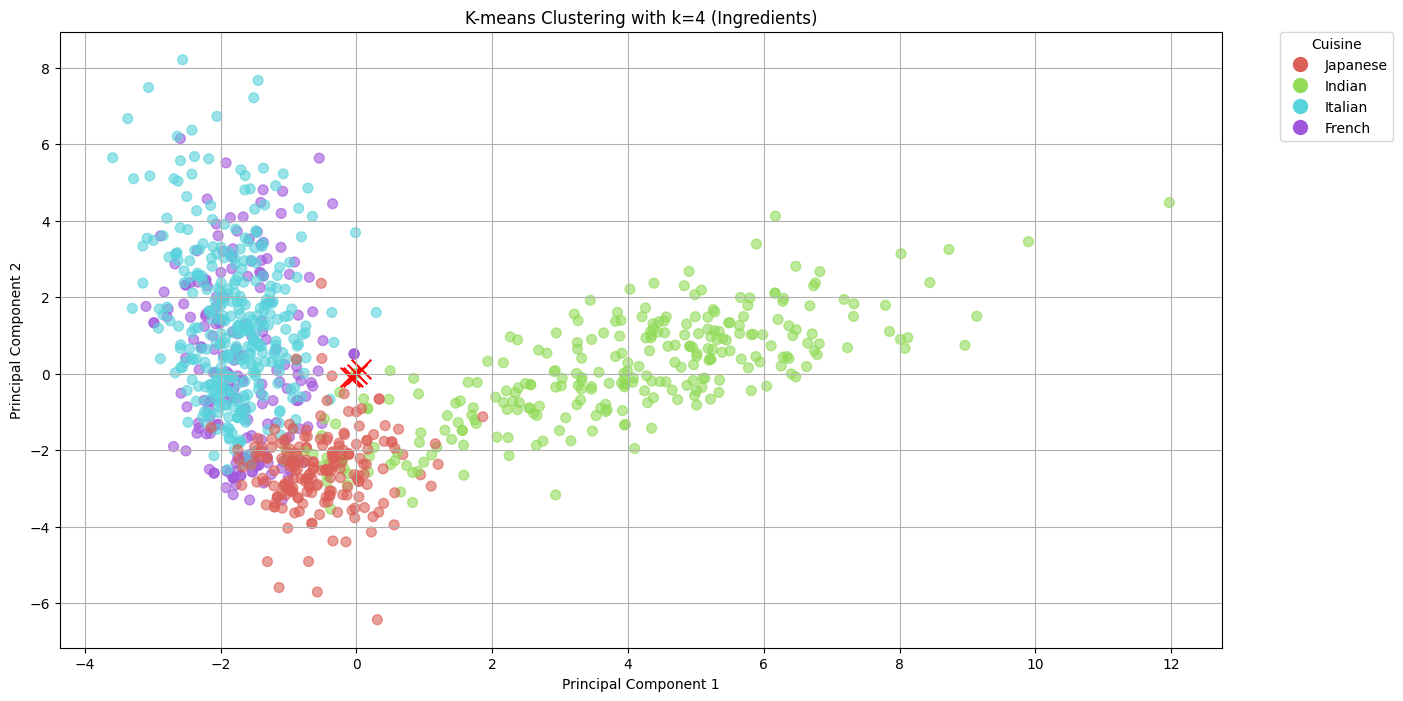

In [ ]:

# Function to perform K-means clustering analysis
def kmeans_analysis(df_X, max_clusters=10):
    inertia = []
    silhouette_scores = []
    kmeans_models = []  # Store KMeans models for visualization

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df_X)

        inertia.append(kmeans.inertia_)
        score = silhouette_score(df_X, kmeans.labels_)
        silhouette_scores.append(score)
        kmeans_models.append(kmeans)  # Store model for later use

    return inertia, silhouette_scores, kmeans_models

# Function to plot the Elbow method results
def plot_elbow(inertia):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(inertia) + 2), inertia, marker='o')
    plt.title('Elbow Method for Optimal k (Ingredients)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(range(2, len(inertia) + 2))
    plt.grid()
    plt.show()

# Function to plot Silhouette scores
def plot_silhouette(silhouette_scores):
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, len(silhouette_scores) + 2), silhouette_scores, marker='o')
    plt.title('Silhouette Scores for Different k (Ingredients)')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(range(2, len(silhouette_scores) + 2))
    plt.grid()
    plt.show()


# Function to plot clustering results using PCA with cuisine names
def plot_clustering_with_pca(X_pca, kmeans, pca, df_filtered, title):
    plt.figure(figsize=(15, 8))

    # Use .loc to set the cluster labels in a safe manner
    df_filtered.loc[:, 'cluster'] = kmeans.labels_

    # Get the unique cuisines and assign a color palette
    unique_cuisines = df_filtered['cuisine'].unique()
    palette = sns.color_palette("hls", len(unique_cuisines))  # Use a color palette large enough for all cuisines
    cuisine_color_map = dict(zip(unique_cuisines, palette))   # Map each cuisine to a color

    # Assign colors to each data point based on cuisine
    colors = df_filtered['cuisine'].map(cuisine_color_map)

    # Scatter plot for all data points with cluster colors
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50, alpha=0.6)

    # Show cluster centers on the scatter plot
    centers = kmeans.cluster_centers_
    plt.scatter(pca.inverse_transform(centers)[:, 0], pca.inverse_transform(centers)[:, 1],
                c='red', marker='x', s=200, label='Cluster Centers')

    # Add the color bar with all cuisine names and their corresponding colors
    handles = [plt.Line2D([0], [0], marker='o', color=c, label=cuisine, markersize=10, linestyle='')
               for cuisine, c in cuisine_color_map.items()]
    plt.legend(handles=handles, title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()



# Select four cuisines and prepare data for ingredients
sublist = ['Italian', 'French', 'Japanese', 'Indian']

# Prepare the data for clustering (do not filter any specific cuisines)
df_ingr_KM4 = yum_ingrX.copy()

# Ensure 'cuisine' and 'recipeName' columns exist in yum_ingr DataFrame
df_ingr_KM4['cuisine'] = yum_ingr['cuisine']
df_ingr_KM4['recipeName'] = yum_ingr['recipeName']

# Filter data by selected cuisines
df_ingr_filtered_MK4 = df_ingr_KM4[df_ingr_KM4['cuisine'].isin(sublist)]

# Drop non-numeric columns for K-means
df_ingr_X_KM4 = df_ingr_filtered_MK4.drop(['cuisine', 'recipeName'], axis=1)

# Scale the data
scaler = StandardScaler()
df_ingr_X_scaled_KM4 = scaler.fit_transform(df_ingr_X_KM4)

# Perform PCA to retain 95% variance
pca4 = PCA(n_components=0.95)
X_pca_KM4 = pca4.fit_transform(df_ingr_X_scaled_KM4)

# Print the number of columns (principal components)
# print("Number of principal components after PCA:", X_pca_KM4.shape[1])

# Perform K-means analysis for ingredients
inertia_ingr4, silhouette_ingr4, kmeans_models4 = kmeans_analysis(pd.DataFrame(X_pca_KM4))

# Plot Elbow method results for ingredients
plot_elbow(inertia_ingr4)

# Plot Silhouette scores for ingredients
plot_silhouette(silhouette_ingr4)

# Choose the optimal number of clusters
optimal_k4 = 4  # Set to the optimal number of clusters found from the plots

# Plot the clustering results for the optimal number of clusters using PCA
kmeans_optimal4 = kmeans_models4[optimal_k4 - 2]  # Access the model for the optimal k
plot_clustering_with_pca(X_pca_KM4, kmeans_optimal4, pca4, df_ingr_filtered_MK4,
                          f'K-means Clustering with k={optimal_k4} (Ingredients)')



## Part 3 : K-Mean Clustering--- Ingredients(All-Cuisine-Type)

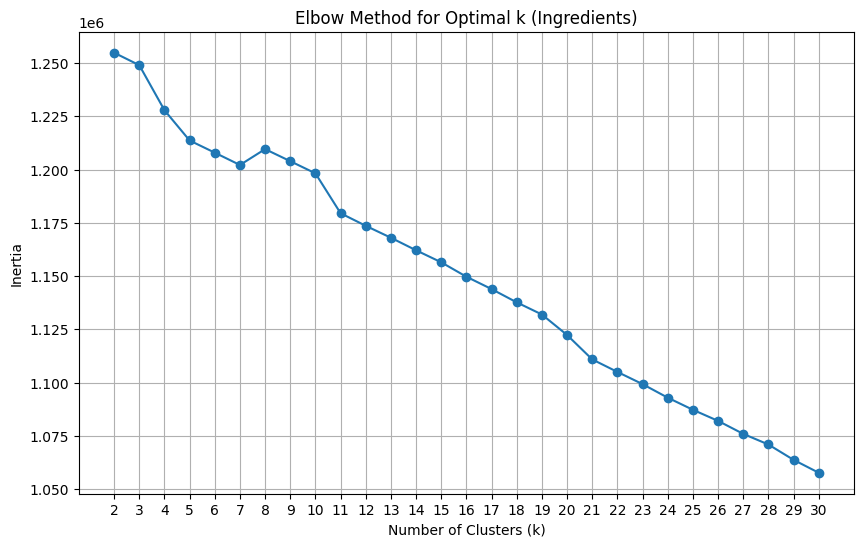

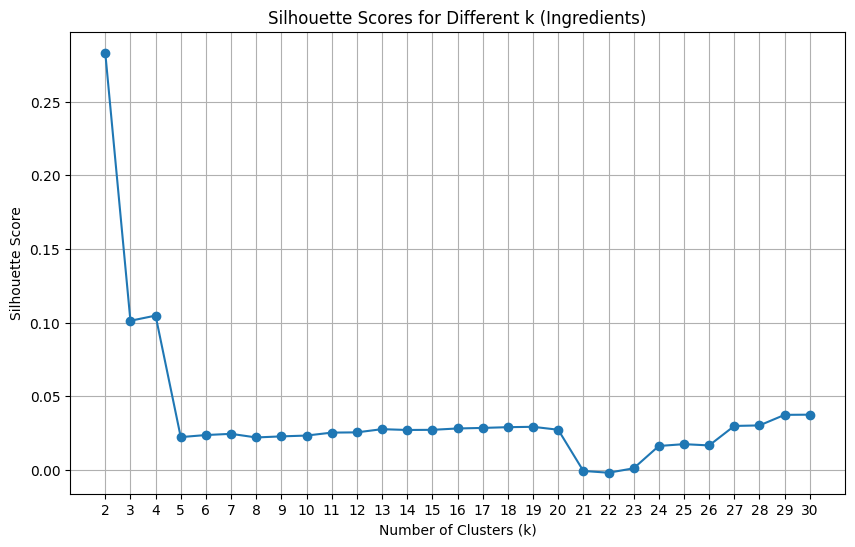

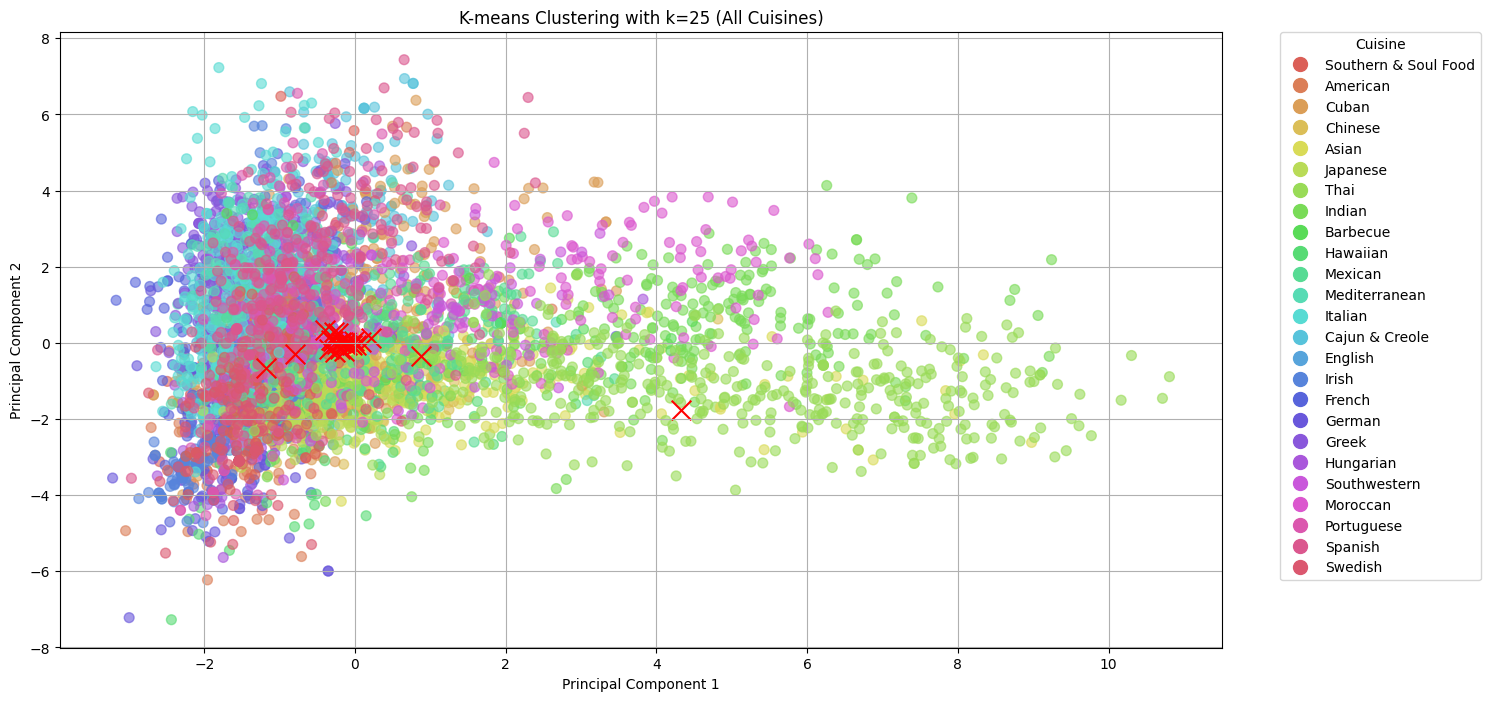

In [ ]:
# Function to perform K-means clustering analysis
def kmeans_analysis1(df_X, max_clusters=30):
    inertia = []
    silhouette_scores = []
    kmeans_models = []  # Store KMeans models for visualization

    for n_clusters in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(df_X)

        inertia.append(kmeans.inertia_)
        score = silhouette_score(df_X, kmeans.labels_)
        silhouette_scores.append(score)
        kmeans_models.append(kmeans)  # Store model for later use

    return inertia, silhouette_scores, kmeans_models



# Function to plot clustering results using PCA and display cuisine clusters with a full color bar
def plot_clustering_with_pca_all_cuisines(X_pca, kmeans, pca, df_filtered, title):
    plt.figure(figsize=(15, 8))

    # Add K-means labels to the dataframe
    df_filtered['cluster'] = kmeans.labels_

    # Get the unique cuisines and assign a color palette
    unique_cuisines = df_filtered['cuisine'].unique()
    palette = sns.color_palette("hls", len(unique_cuisines))  # Use a color palette large enough for all cuisines
    cuisine_color_map = dict(zip(unique_cuisines, palette))   # Map each cuisine to a color

    # Assign colors to each data point based on cuisine
    colors = df_filtered['cuisine'].map(cuisine_color_map)

    # Scatter plot for all data points with cluster colors
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, s=50, alpha=0.6)

    # Show cluster centers on the scatter plot
    centers = kmeans.cluster_centers_
    plt.scatter(pca.inverse_transform(centers)[:, 0], pca.inverse_transform(centers)[:, 1],
                c='red', marker='x', s=200, label='Cluster Centers')

    # Add the color bar with all cuisine names and their corresponding colors
    handles = [plt.Line2D([0], [0], marker='o', color=c, label=cuisine, markersize=10, linestyle='')
               for cuisine, c in cuisine_color_map.items()]
    plt.legend(handles=handles, title='Cuisine', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.grid()
    plt.show()

# Prepare the data for clustering (do not filter any specific cuisines)
df_ingr_KM = yum_ingrX.copy()

df_ingr_KM['cuisine'] = yum_ingr['cuisine']
df_ingr_KM['recipeName'] = yum_ingr['recipeName']

# No filtering, use all cuisines
df_ingr_all_KM = df_ingr_KM.copy()

# Drop non-numeric columns for K-means
df_ingr_X_KM = df_ingr_all_KM.drop(['cuisine', 'recipeName'], axis=1)

# Scale the data
scaler = StandardScaler()
df_ingr_X_scaled_KM = scaler.fit_transform(df_ingr_X_KM)

# Perform PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca_KM = pca.fit_transform(df_ingr_X_scaled_KM)

# Step 1: Perform K-means analysis with the provided data
# Perform K-means analysis for ingredients
inertia_ingr, silhouette_ingr, kmeans_models = kmeans_analysis1(pd.DataFrame(X_pca_KM))

# Step 2: Plot the Elbow method to visualize inertia and find the "elbow"
plot_elbow(inertia_ingr)

# Step 3: Plot the Silhouette scores to identify the highest score
plot_silhouette(silhouette_ingr)

# Step 4: Based on the plots, decide the optimal number of clusters.
# Choose the optimal number of clusters (based on Elbow or Silhouette analysis)
optimal_k = 25  # Adjust this based on your analysis

# Step 5: Plot the clustering results for the optimal number of clusters using PCA
# Plot the clustering results for the optimal number of clusters using PCA
kmeans_optimal = kmeans_models[optimal_k - 2]
plot_clustering_with_pca_all_cuisines(X_pca_KM, kmeans_optimal, pca, df_ingr_all_KM, f'K-means Clustering with k={optimal_k} (All Cuisines)')


In [ ]:

print(X_pca_KM.shape)

(5622, 208)


## Part 3 : K-Mean Clustering--- Flavor

### For All-Cuisine-Type
- The K-means model can't effectively use the elbow and silhouette scores to determine a reasonable number of clusters (N). This suggests that the model may not be suitable for the entire dataset of cuisines.
-  From the scatter plot, assigning N=21 (which aligns with known cuisine results from the original flavor data) further supports the conclusions drawn from the elbow and silhouette scores. The scatter plot shows that different colored dots are scattered throughout the plot, indicating a lack of clear clustering.

### Conclusion
- The K-means model does not perform well on high-dimensional datasets due to the "curse of dimensionality," which can result in ineffective clustering.
- The flavor dataset is challenging to distinguish by cuisine, as different cuisines share some common flavors.

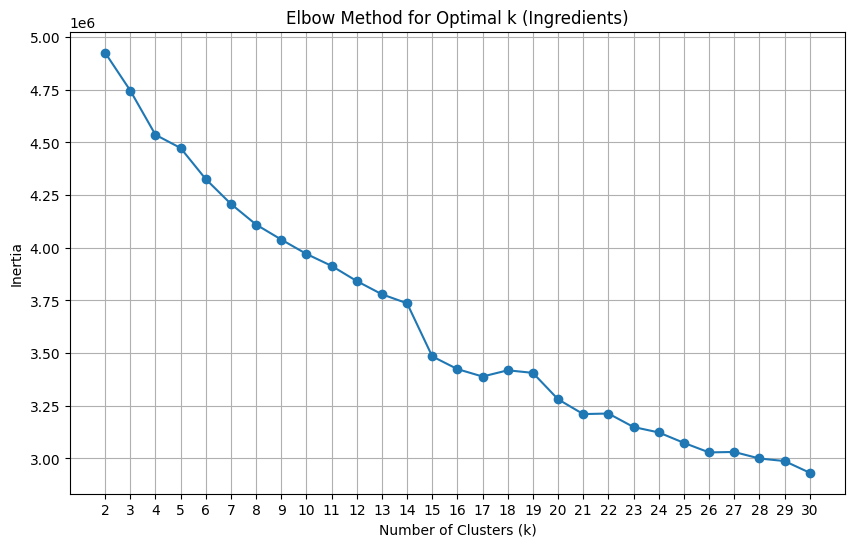

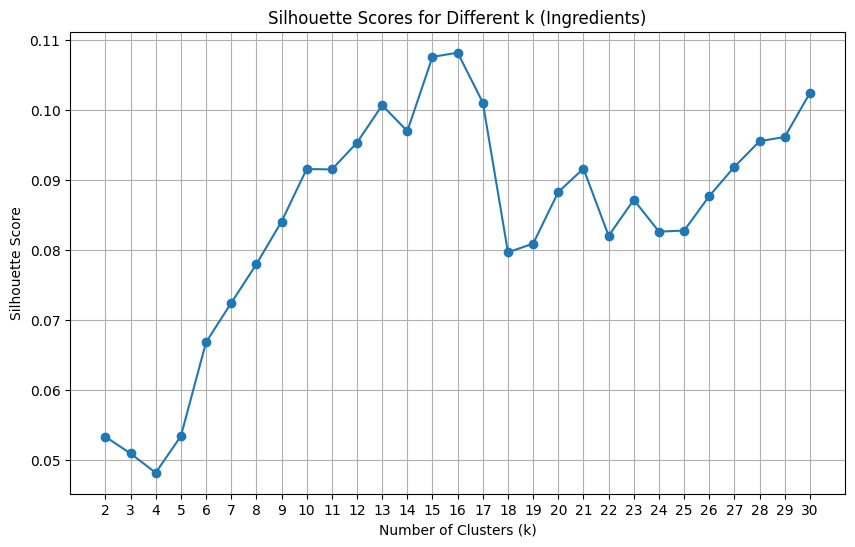

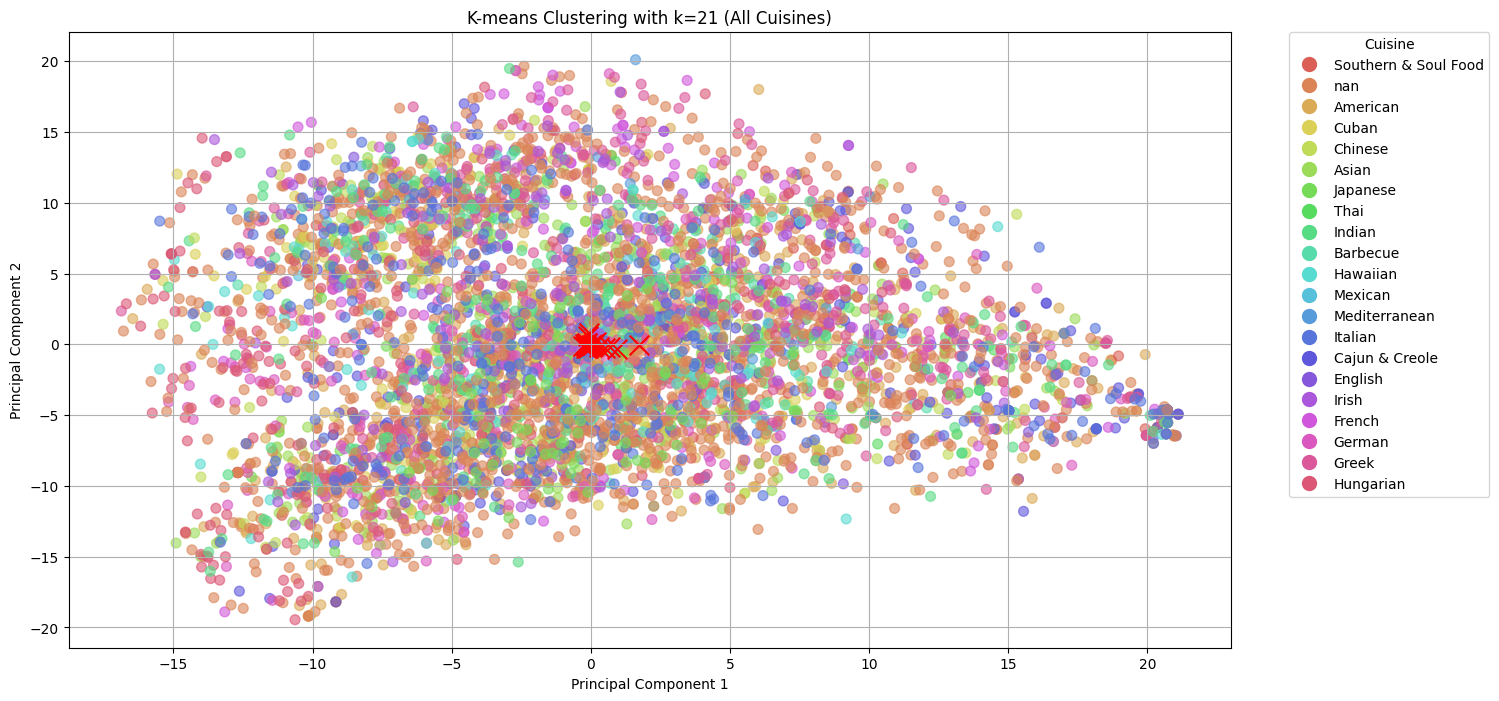

In [ ]:
# Prepare the data for clustering (do not filter any specific cuisines)
df_flavor_KM = yum_tfidf.copy()

df_flavor_KM['cuisine'] = yum_ingr['cuisine']
df_flavor_KM['recipeName'] = yum_ingr['recipeName']

# No filtering, use all cuisines
df_flavor_all_KM = df_flavor_KM.copy()

# Drop non-numeric columns for K-means
df_flavor_all_KM1 = df_flavor_all_KM.drop(['cuisine', 'recipeName'], axis=1)

# Scale the data
scaler = StandardScaler()
df_flavor_X_scaled_KM = scaler.fit_transform(df_flavor_all_KM1)

# Perform PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca_flavor_KM = pca.fit_transform(df_flavor_X_scaled_KM)

# Step 1: Perform K-means analysis with the provided data
# Perform K-means analysis for ingredients
inertia_flavor, silhouette_flavor, kmeans_models_flavor = kmeans_analysis1(pd.DataFrame(X_pca_flavor_KM))

# Step 2: Plot the Elbow method to visualize inertia and find the "elbow"
plot_elbow(inertia_flavor)

# Step 3: Plot the Silhouette scores to identify the highest score
plot_silhouette(silhouette_flavor)

# Step 4: Based on the plots, decide the optimal number of clusters.
# Choose the optimal number of clusters (based on Elbow or Silhouette analysis)
optimal_k_flavor = 21 # Adjust this based on your analysis

# Step 5: Plot the clustering results for the optimal number of clusters using PCA
# Plot the clustering results for the optimal number of clusters using PCA
kmeans_optimal_flavor = kmeans_models_flavor[optimal_k_flavor - 2]
plot_clustering_with_pca_all_cuisines(X_pca_flavor_KM, kmeans_optimal_flavor, pca, df_flavor_all_KM, f'K-means Clustering with k={optimal_k_flavor} (All Cuisines)')

# Part 4 : DBSCAN, Hierarchical and GMM Clustering
- For the ingredients and flavor datasets, all these models (DBSCAN, Hierarchical and GMM Clustering) don't work well even though I use the PCA to reduce dimensions and use optimizations for models. There are lots of overflapping. It is hard to find the clear boundary.
- The DBSCAN performance the worst no matter the ingredients dataset or flavor dataset.
- The Hierarchical and GMM Clustering performances a little bit well for the ingredients dataset, but still bad for the flavor dataset. Among these 2 models, the GMM is better than Hierarchical.


In [ ]:
from sklearn.cluster import DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors

## Part 4: Prepare the Ingredients and Flavor Data after PCA

In [ ]:
# Prepare the data for clustering (do not filter any specific cuisines)
df_ingr_part4 = yum_ingrX.copy()

df_ingr_part4['cuisine'] = yum_ingr['cuisine']
df_ingr_part4['recipeName'] = yum_ingr['recipeName']

# No filtering, use all cuisines
df_ingr_all_part4 = df_ingr_part4.copy()

# Drop non-numeric columns for K-means
df_ingr_X_part4 = df_ingr_all_part4.drop(['cuisine', 'recipeName'], axis=1)

# Scale the data
scaler = StandardScaler()
df_ingr_X_scaled_part4 = scaler.fit_transform(df_ingr_X_part4)

# Perform PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca_part4 = pca.fit_transform(df_ingr_X_scaled_part4)


In [ ]:
# Prepare the data for clustering (do not filter any specific cuisines)
df_flavor_part4 = yum_tfidf.copy()

df_flavor_part4['cuisine'] = yum_ingr['cuisine']
df_flavor_part4['recipeName'] = yum_ingr['recipeName']

# No filtering, use all cuisines
df_flavor_all_part4 = df_flavor_part4.copy()

# Drop non-numeric columns for K-means
df_flavor_X_part4 = df_flavor_all_part4.drop(['cuisine', 'recipeName'], axis=1)

# Scale the data
scaler = StandardScaler()
df_flavor_X_scaled_part4 = scaler.fit_transform(df_flavor_X_part4)

# Perform PCA to retain 95% variance
pca = PCA(n_components=0.95)
X_pca_flavor_part4 = pca.fit_transform(df_flavor_X_scaled_part4)

## Part 4 : DBSCAN --- Ingredients


Best Parameters:
Eps: 0.1, Min Samples: 10, Best Silhouette Score: 1.000


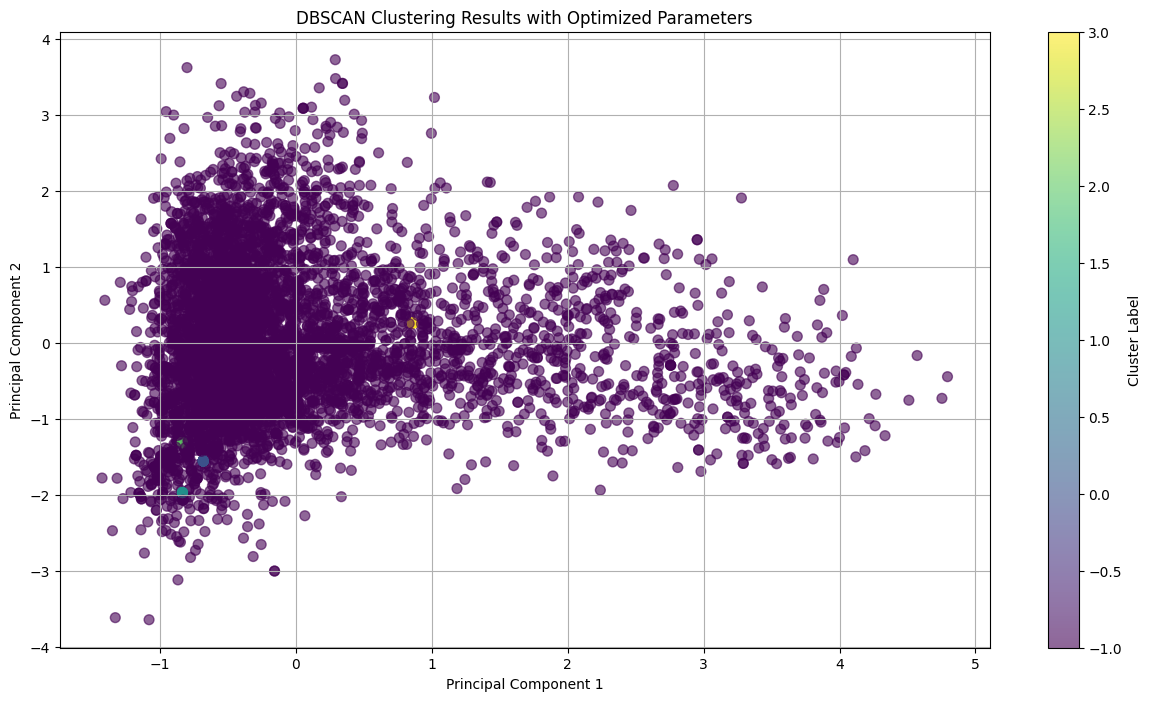

In [ ]:
# Scale your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca_part4)  # Replace with your actual PCA features

# Define the range for eps and min_samples
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]
min_samples_values = [2, 5, 10]

# Best parameters initialization
best_score = -1
best_params = None
best_labels = None

# Evaluate combinations of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)

        # Calculate silhouette score for non-noise points if there are clusters
        if len(set(dbscan_labels)) > 1:  # Ensure there is more than 1 cluster
            score = silhouette_score(X_scaled[dbscan_labels != -1], dbscan_labels[dbscan_labels != -1])
            # print(f'Eps: {eps}, Min Samples: {min_samples}, Silhouette Score: {score:.3f}')

            # Update best score and parameters if the current score is higher
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)
                best_labels = dbscan_labels

# Summary of findings
print(f'\nBest Parameters:\nEps: {best_params[0]}, Min Samples: {best_params[1]}, Best Silhouette Score: {best_score:.3f}')

# Plot the best DBSCAN results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

# If best_labels is not None, plot the results
if best_labels is not None:
    plot_clustering_results(X_scaled, best_labels, 'DBSCAN Clustering Results with Optimized Parameters')

## Part 4 : DBSCAN --- Flavor

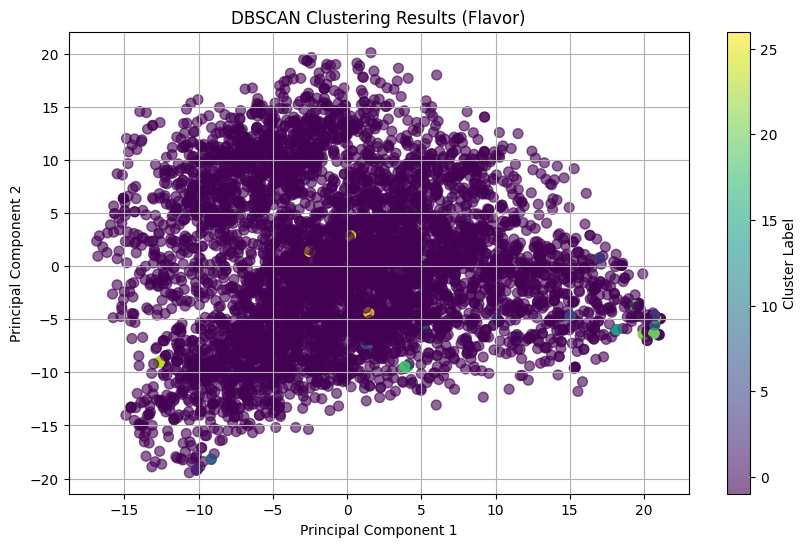

In [ ]:
# 1. DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=4)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(X_pca_flavor_part4)


# Function to plot clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

# Plot DBSCAN results
plot_clustering_results(X_pca_flavor_part4, dbscan_labels, 'DBSCAN Clustering Results (Flavor)')




## Part 4 : Hierarchical --- Ingredients

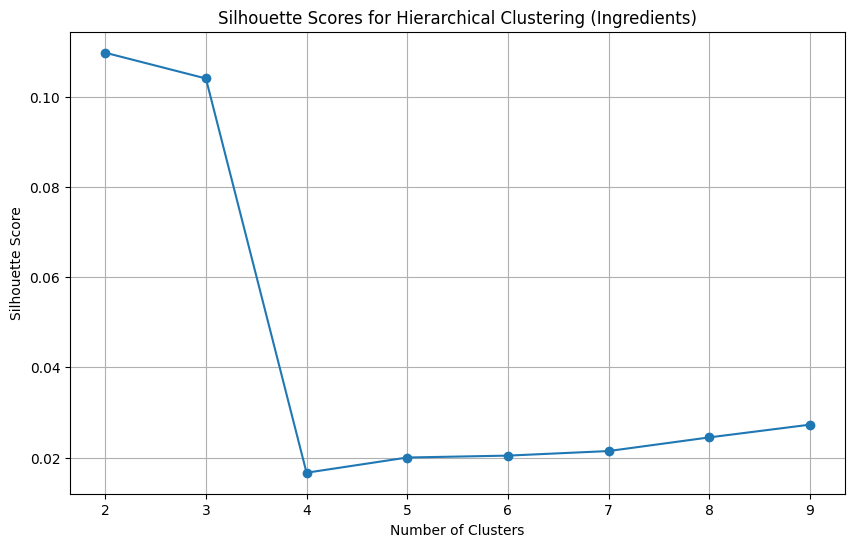

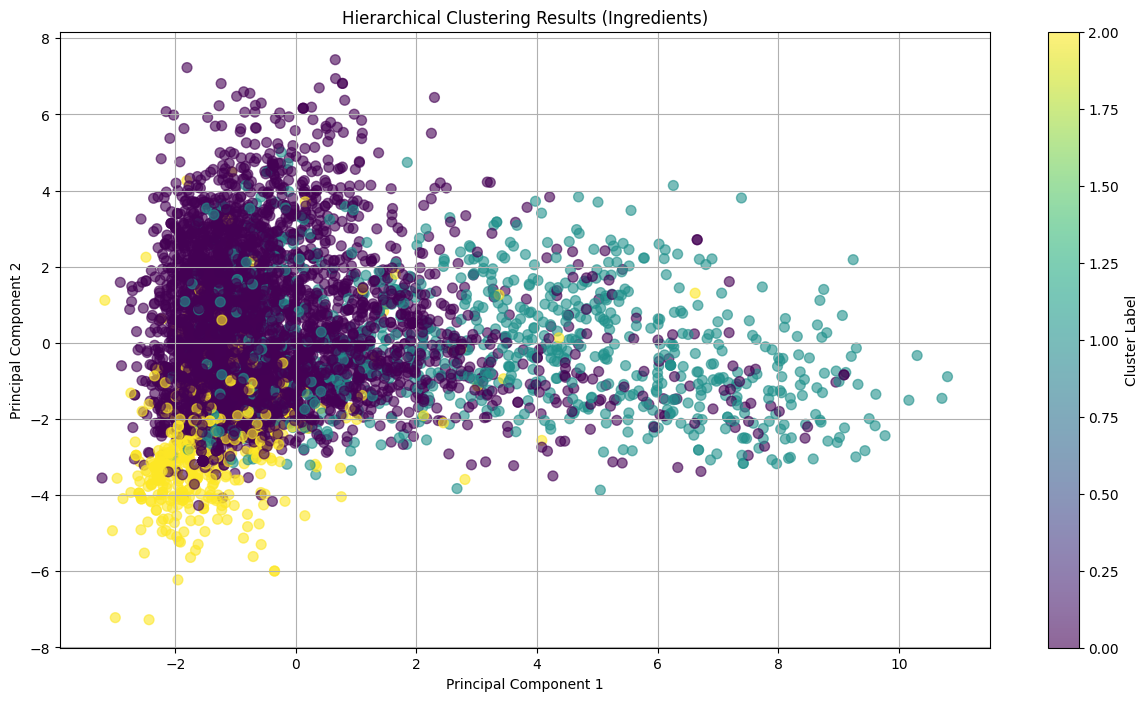

In [ ]:
silhouette_scores = []
cluster_range = range(2, 10)  # Adjust this range as needed

for n_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X_pca_part4)
    score = silhouette_score(X_pca_part4, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Hierarchical Clustering (Ingredients)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


# 2. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)  # Choose number of clusters
hierarchical_labels = hierarchical.fit_predict(X_pca_part4)

# Function to plot clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

# Plot Hierarchical Clustering results
plot_clustering_results(X_pca_part4, hierarchical_labels, 'Hierarchical Clustering Results (Ingredients)')



## Part 4 : Hierarchical --- Flavor

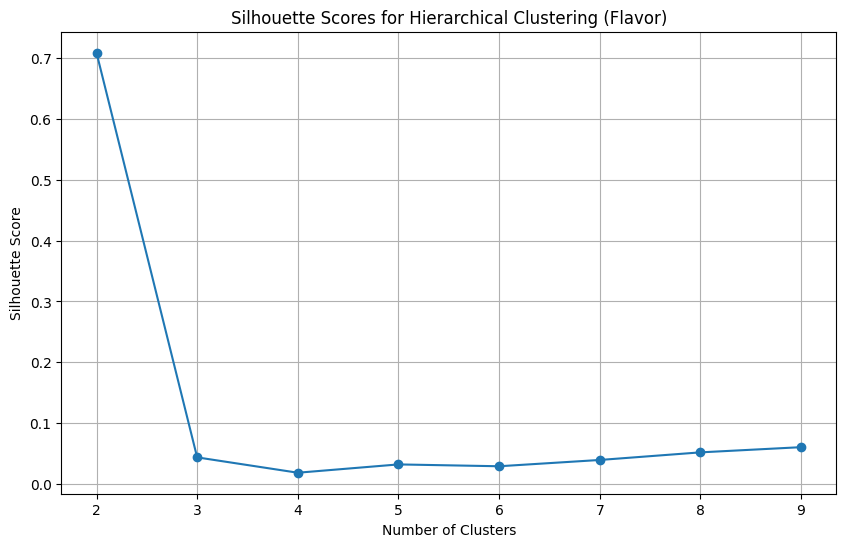

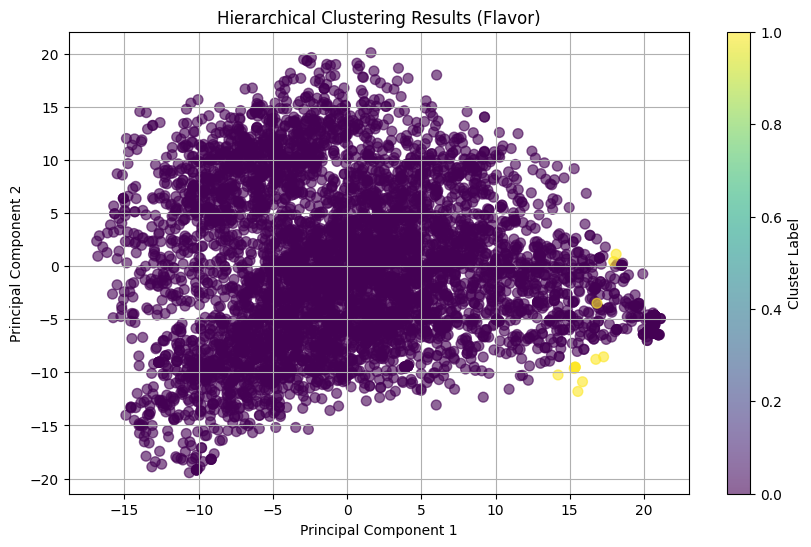

In [ ]:
silhouette_scores = []
cluster_range = range(2, 10)  # Adjust this range as needed

for n_clusters in cluster_range:
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X_pca_flavor_part4)
    score = silhouette_score(X_pca_flavor_part4, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Hierarchical Clustering (Flavor)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()


# 2. Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=2)  # Choose number of clusters
hierarchical_labels = hierarchical.fit_predict(X_pca_flavor_part4)

# Function to plot clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()

# Plot Hierarchical Clustering results
plot_clustering_results(X_pca_flavor_part4, hierarchical_labels, 'Hierarchical Clustering Results (Flavor)')



## Part 4 : GMM --- Ingredients

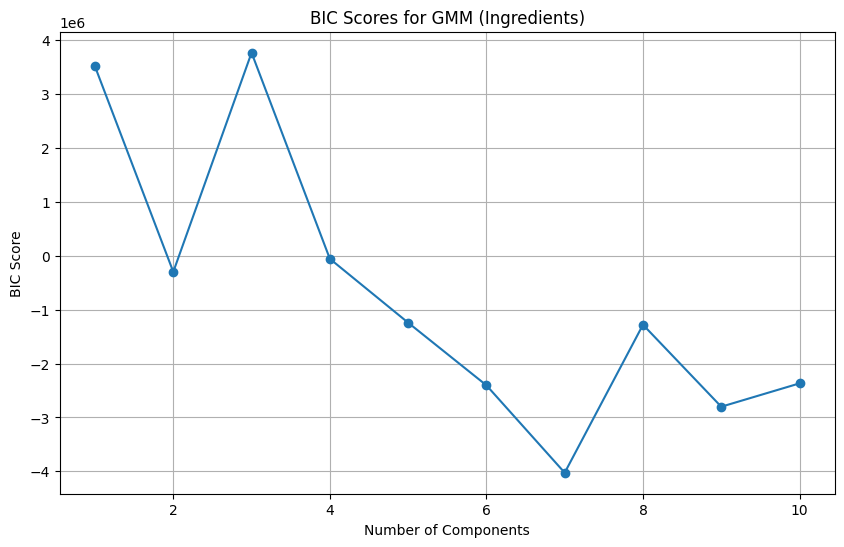

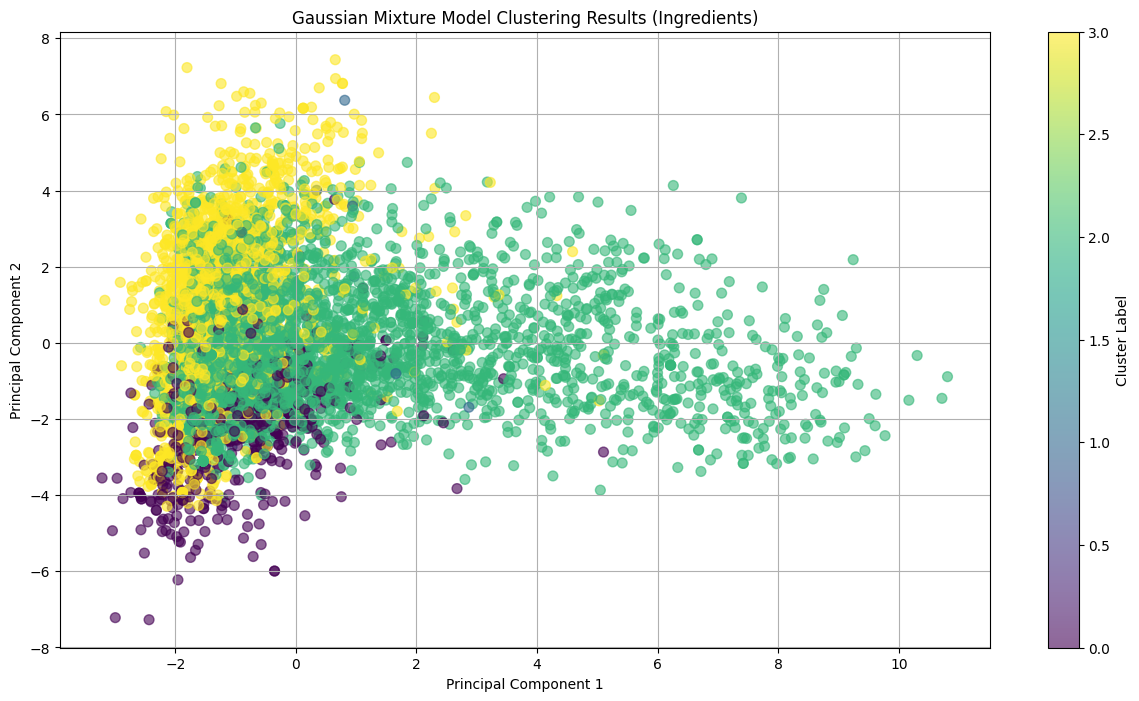

In [ ]:
bic_scores = []
n_components_range = range(1, 11)  # Adjust this range as needed

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca_part4)
    bic_scores.append(gmm.bic(X_pca_part4))

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores for GMM (Ingredients)')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.grid()
plt.show()


# 3. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4)  # Choose number of components
gmm.fit(X_pca_part4)
gmm_labels = gmm.predict(X_pca_part4)

# Function to plot clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()


# Plot GMM results
plot_clustering_results(X_pca_part4, gmm_labels, 'Gaussian Mixture Model Clustering Results (Ingredients)')


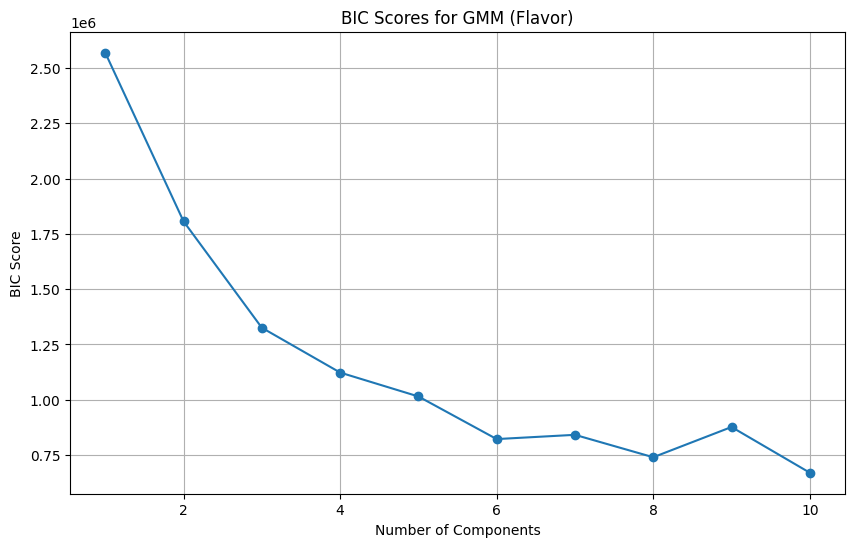

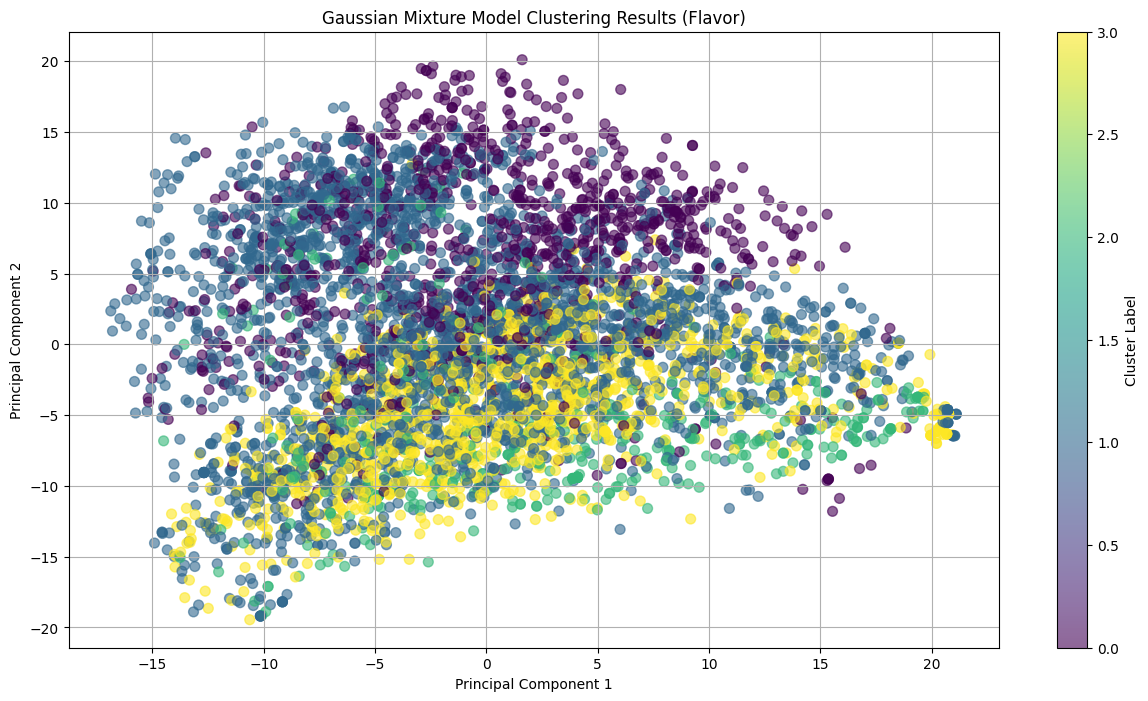

In [ ]:
bic_scores = []
n_components_range = range(1, 11)  # Adjust this range as needed

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(X_pca_flavor_part4)
    bic_scores.append(gmm.bic(X_pca_flavor_part4))

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores for GMM (Flavor)')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.grid()
plt.show()


# 3. Gaussian Mixture Model (GMM)
gmm = GaussianMixture(n_components=4)  # Choose number of components
gmm.fit(X_pca_flavor_part4)
gmm_labels = gmm.predict(X_pca_flavor_part4)

# Function to plot clustering results
def plot_clustering_results(X, labels, title):
    plt.figure(figsize=(15, 8))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.colorbar(label='Cluster Label')
    plt.grid()
    plt.show()


# Plot GMM results
plot_clustering_results(X_pca_flavor_part4, gmm_labels, 'Gaussian Mixture Model Clustering Results (Flavor)')
